# **Euler's Method for Solving Ordinary Differential Equations (ODEs)**

## **What is Euler’s Method?**
Euler’s method is a **numerical approach** for solving **ordinary differential equations (ODEs)**. Here one example:

$$
\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0
$$

where:
- $y$ is the unknown function.
- $f(x, y)$ is the **derivative** (rate of change) of $y$ with respect to $x$.
- $(x_0, y_0)$ is the **initial condition**.








Euler's method approximates the solution by iterating over small steps of size \( h \) using the update formula:

$$
y_{n+1} = y_n + h f(x_n, y_n)
$$

where:
- $ y_n $ is the approximation of $ y(x_n) $,
- $ x_{n+1} = x_n + h $,
- $ h $ is the step size.
- initial condition y(0) must be specified 

## Step-by-Step Implementation
1. **Initialize**: Start with the given initial condition $ (x_0, y_0) $.
2. **Iterate**: Compute successive values using the Euler update formula.
3. **Stop** when the desired interval $ [x_0, x_{ext{end}}] $ is reached.





# **Euler's Method and Step Size Convergence Analysis**

## **Example Convergence with h**
This script demonstrates how **Euler's method** behaves for solving the ordinary differential equation (ODE):

$$
\frac{dy(x)}{dx} = -2y(x)
$$

with the initial condition:

$$
y(0) = 1
$$

The analytical solution for this equation is given by:

$$
y(x) = e^{-2x}
$$

Euler’s method approximates the solution numerically, and the accuracy of the approximation depends on the choice of **step size** $ h $.
In this example the the derivative has been defined as a function of one variable y(x) and f(y) is dy/dx


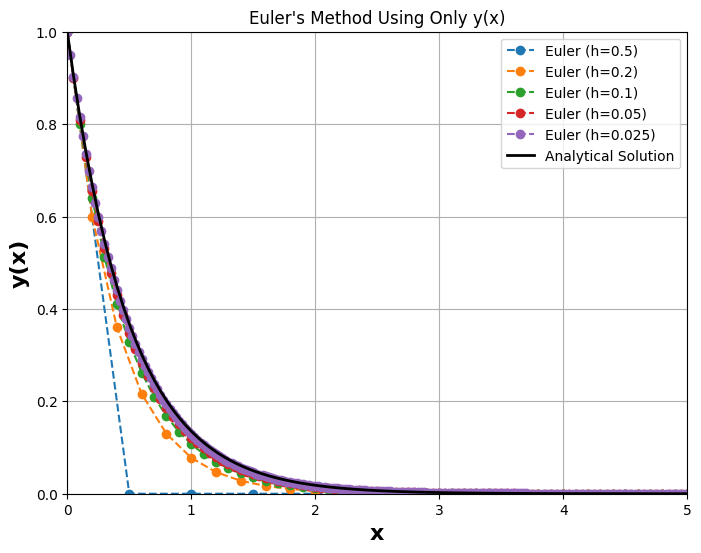

In [62]:
import numpy as np
import matplotlib.pyplot as plt

############################################################################
# Define the ODE dy/dx = f(y)
def f(y):
    return -2 * y  # Exponential decay
############################################################################


####################################################################################################
############################ Euler's Method Implementation #########################################

# Euler's Method  y(x)
def euler_method(f, y0, x_end, h):
    x_values = np.arange(0, x_end + h, h)  # Generate x values
    y_values = np.zeros(len(x_values))  # Store computed values
    y_values[0] = y0  # Initial condition

    # Apply Euler's method
    for i in range(1, len(x_values)):
        y_values[i] = y_values[i-1] + h * f(y_values[i-1])  # Only 'y' is updated

    return x_values, y_values
####################################################################################################
####################################################################################################



# Parameters
y0 = 1       # Initial condition y(0) = 1
x_end = 5    # Final x value
h_values = [0.5, 0.2, 0.1, 0.05, 0.025]  # Step sizes
h=0.5      # Step size
x_values, y_euler = euler_method(f, y0, x_end, h)

#plt.plot(y_euler)

plt.figure(figsize=(8, 6))

# Compute and plot Euler's method for different step sizes
for h in h_values:
    x_values, y_euler = euler_method(f, y0, x_end, h)
    y_exact = y0 * np.exp(-2 * x_values)  # Analytical solution

    plt.plot(x_values, y_euler, marker='o', linestyle='--', label=f"Euler (h={h})")

# Plot analytical solution
x_fine = np.linspace(0, x_end, 100)
y_fine = y0 * np.exp(-2 * x_fine)
plt.plot(x_fine, y_fine, label="Analytical Solution", linestyle='-', linewidth=2, color='black')

# Labels and legend
plt.xlabel('x', fontsize=16, fontweight='bold')
plt.ylabel('y(x)', fontsize=16, fontweight='bold')
plt.title("Euler's Method Using Only y(x)")
plt.xlim(0, x_end)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()



## **Analysis of the local and global error with h**

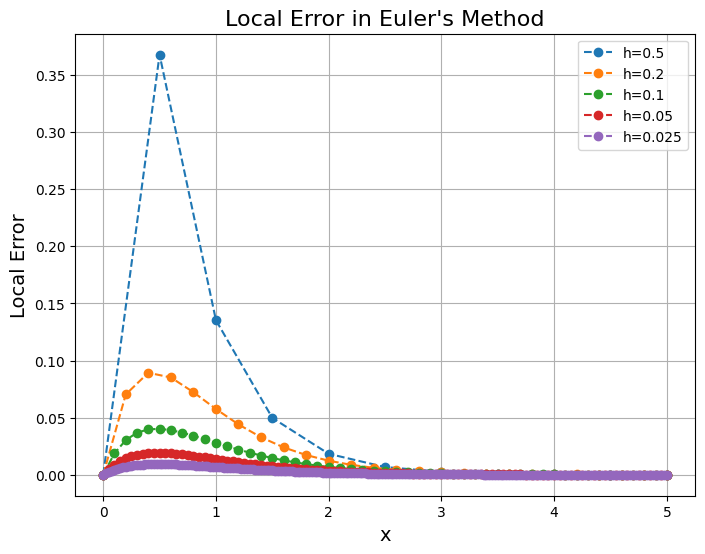

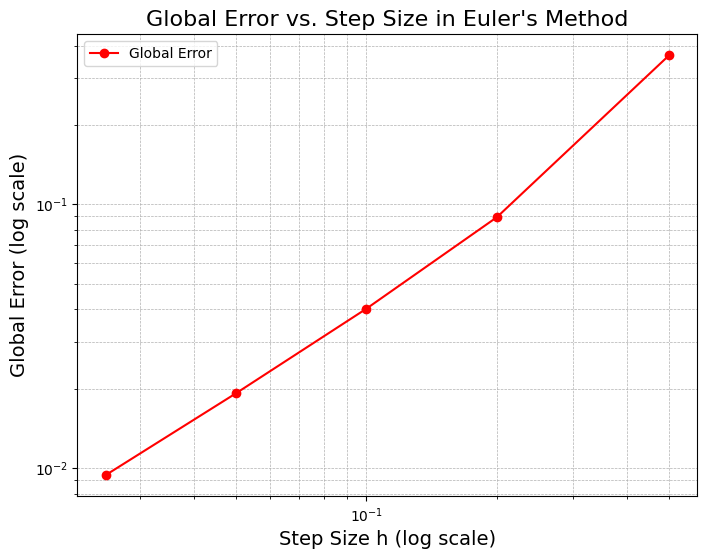

In [63]:


global_errors = []

# Plot local errors
plt.figure(figsize=(8, 6))

for h in step_sizes:
    # Compute Euler's solution
    x_values, y_euler = euler_method(f, y0, x_end, h)
    y_exact = analytical_solution(x_values)

    # Compute local errors
    local_errors = np.abs(y_exact - y_euler)

    # Store global error (maximum local error)
    global_errors.append(np.max(local_errors))

    # Plot local error
    plt.plot(x_values, local_errors, marker='o', linestyle='--', label=f"h={h}")

# Format local error plot
plt.xlabel("x", fontsize=14)
plt.ylabel("Local Error", fontsize=14)
plt.title("Local Error in Euler's Method", fontsize=16)
plt.legend()
plt.grid(True)

# Plot global error trend (log-log plot)
plt.figure(figsize=(8, 6))
plt.loglog(step_sizes, global_errors, marker='o', linestyle='-', color='red', label="Global Error")

# Format global error plot
plt.xlabel("Step Size h (log scale)", fontsize=14)
plt.ylabel("Global Error (log scale)", fontsize=14)
plt.title("Global Error vs. Step Size in Euler's Method", fontsize=16)
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

## **Example oscillating solution**
$$
\frac{dy}{dx} = -2y + 2\cos(x)
$$

with the initial condition:

$$
y(0) = 1
$$

The analytical solution is given by:

$$
y(x) = \cos(x) + \sin(x)
$$

Euler's method solve it by iteratively estimating values based on the slope at previous points.
In this example the derivative has been defind as a function of two variables f(x, y) = dy/dx


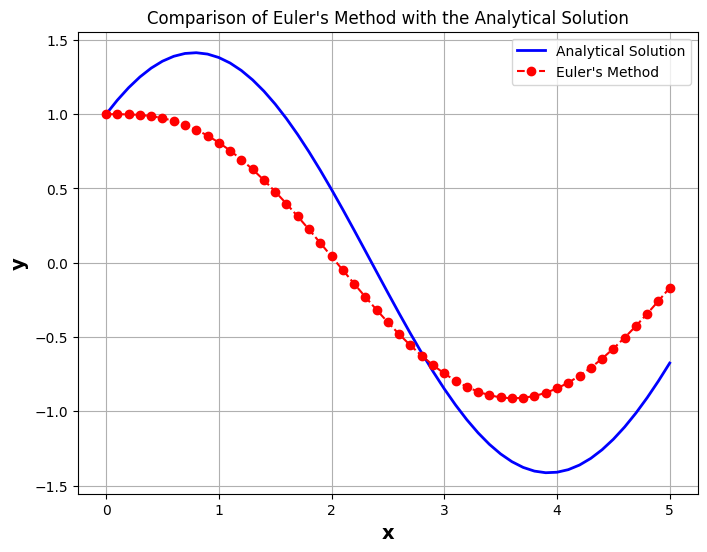

In [35]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')  # Ensures a white background




################### Define the ODE function dy/dx = f(x, y) ######################################
def f(x, y):
    return -2*y + 2*np.cos(x)

# Analytical solution y(x) = cos(x) + sin(x)
def analytical_solution(x):
    return np.cos(x) + np.sin(x)

####################################################################################################
############################ Euler's Method Implementation #########################################

# Euler's Method Implementation
def euler_method(f, x0, y0, h, x_end):
    x_values = np.arange(x0, x_end + h, h)  # Generate x values
    y_values = np.zeros(len(x_values))  # Array to store y values
    y_values[0] = y0  # Initial condition

    for i in range(1, len(x_values)):
        y_values[i] = y_values[i-1] + h * f(x_values[i-1], y_values[i-1])

    return x_values, y_values

####################################################################################################
####################################################################################################

# Parameters
x0, y0 = 0, 1  # Initial condition y(0) = 1
h = 0.1  # Step size
x_end = 5  # Solve until x = 5

# Solve ODE using Euler's Method
x_values, y_euler = euler_method(f, x0, y0, h, x_end)

# Compute the analytical solution
y_exact = analytical_solution(x_values)

# Plot the solutions
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_exact, label="Analytical Solution", linestyle='-', linewidth=2, color='blue')
plt.plot(x_values, y_euler, label="Euler's Method", marker='o', linestyle='--', color='red')
plt.xlabel('x', fontsize=14, fontweight='bold')
plt.ylabel('y', fontsize=14, fontweight='bold')
plt.title("Comparison of Euler's Method with the Analytical Solution")
plt.legend()
plt.grid(True)
plt.show()

## **Example non-converged solution**
Solve the ODE:

$$
\frac{dy}{dx} = x + y, \quad y(0) = 1
$$

using Euler's method with step size $ h = 0.1 $ up to $ x = 0.5 $.



#### **Table of Iterations**
| n  | $ x_n $  | $ y_n $ (Euler)|  $ y(x_n) $ (Analytical) | Error | 
|----|------|------------|----------------|----------------|
| 0  | 0.0  | 1.0000     | 1.0000         | 0.0000        |
| 1  | 0.1  | 1.1000     | 1.2110         | 0.0090        |
| 2  | 0.2  | 1.2200     | 1.4463         | 0.0843        |
| 3  | 0.3  | 1.3620     | 1.7089         | 0.1807        |
| 4  | 0.4  | 1.5282     | 2.0013         | 0.2803        |
| 5  | 0.5  | 1.7210     | 2.3266         | 0.3835        |


## **Solution of f(x) = (1 + x)exp(x)**

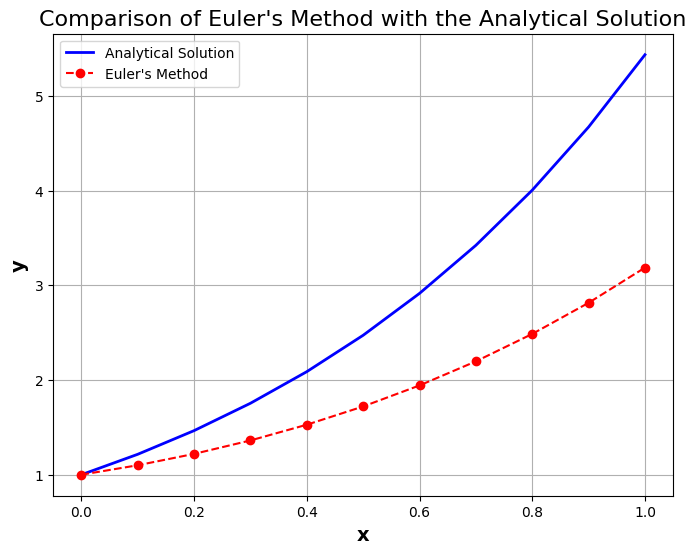

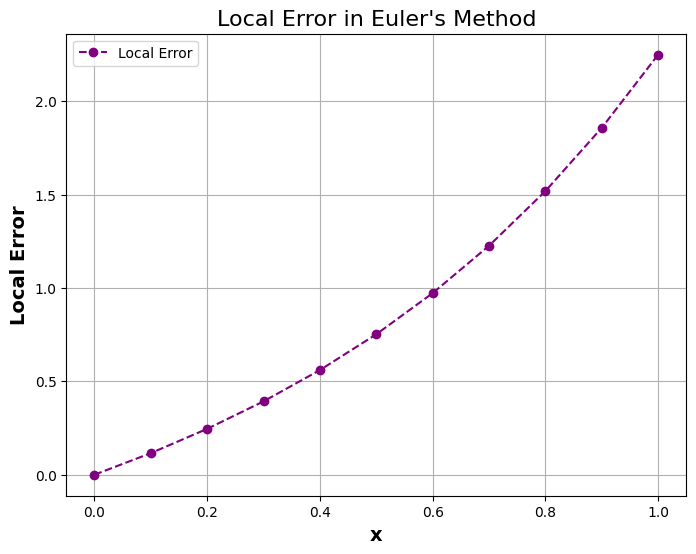

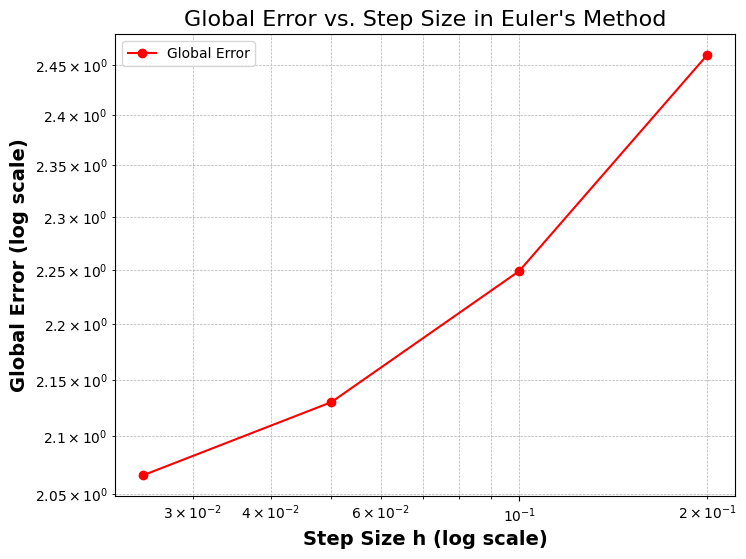

In [64]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')  # Ensures a white background

# Define the ODE function dy/dx = f(x, y)
def f(x, y):
    return x + y

# Analytical solution y(x) = (1 + x) * e^x
def analytical_solution(x):
    return (1 + x) * np.exp(x)

####################################################################################################
############################ Euler's Method Implementation #########################################

# Euler's Method Implementation
def euler_method(f, x0, y0, h, x_end):
    x_values = np.arange(x0, x_end + h, h)  # Generate x values
    y_values = np.zeros(len(x_values))  # Array to store y values
    y_values[0] = y0  # Initial condition

    for i in range(1, len(x_values)):
        y_values[i] = y_values[i-1] + h * f(x_values[i-1], y_values[i-1])

    return x_values, y_values

####################################################################################################
####################################################################################################

# Parameters
x0, y0 = 0, 1  # Initial condition y(0) = 1
h = 0.1  # Step size
x_end = 1  # Solve until x = 1

# Solve ODE using Euler's Method
x_values, y_euler = euler_method(f, x0, y0, h, x_end)

# Compute the analytical solution
y_exact = analytical_solution(x_values)

# Compute Local Errors (Stepwise Error)
local_errors = np.abs(y_exact - y_euler)

# Compute Global Error (Maximum Error)
global_errors = []
step_sizes = [0.2, 0.1, 0.05, 0.025]
for h in step_sizes:
    x_vals, y_eul = euler_method(f, x0, y0, h, x_end)
    y_ex = analytical_solution(x_vals)
    global_errors.append(np.max(np.abs(y_ex - y_eul)))

####################################################################################################
################################## Plot Results ####################################################

# Plot numerical vs analytical solution
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_exact, label="Analytical Solution", linestyle='-', linewidth=2, color='blue')
plt.plot(x_values, y_euler, label="Euler's Method", marker='o', linestyle='--', color='red')
plt.xlabel('x', fontsize=14, fontweight='bold')
plt.ylabel('y', fontsize=14, fontweight='bold')
plt.title("Comparison of Euler's Method with the Analytical Solution", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

# Plot Local Error
plt.figure(figsize=(8, 6))
plt.plot(x_values, local_errors, marker='o', linestyle='--', color='purple', label="Local Error")
plt.xlabel('x', fontsize=14, fontweight='bold')
plt.ylabel('Local Error', fontsize=14, fontweight='bold')
plt.title("Local Error in Euler's Method", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

# Plot Global Error vs Step Size (Log-Log Plot)
plt.figure(figsize=(8, 6))
plt.loglog(step_sizes, global_errors, marker='o', linestyle='-', color='red', label="Global Error")
plt.xlabel('Step Size h (log scale)', fontsize=14, fontweight='bold')
plt.ylabel('Global Error (log scale)', fontsize=14, fontweight='bold')
plt.title("Global Error vs. Step Size in Euler's Method", fontsize=16)
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

### **Decreasing h does not help coonvenrgence**

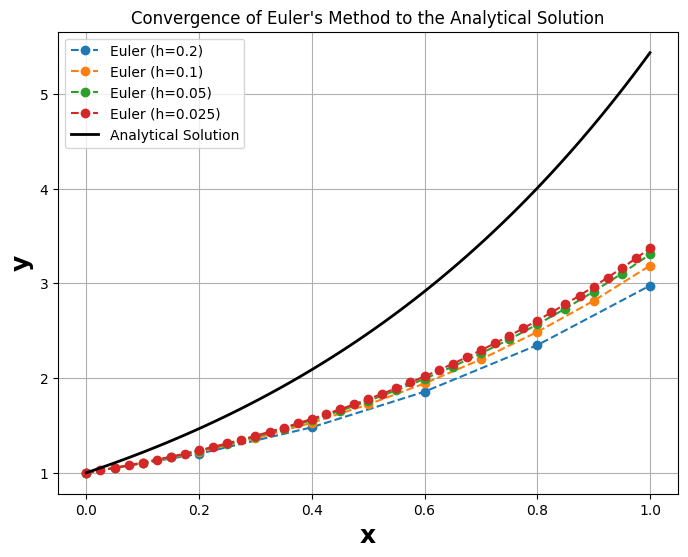

In [39]:

# Parameters
x0, y0 = 0, 1  # Initial condition y(0) = 1
x_end = 1  # Solve until x = 1

# Different step sizes to analyze convergence
step_sizes = [0.2, 0.1, 0.05, 0.025]

plt.figure(figsize=(8, 6))

# Plot numerical solutions with different step sizes
for h in step_sizes:
    x_values, y_euler = euler_method(f, x0, y0, h, x_end)
    y_exact = analytical_solution(x_values)
    plt.plot(x_values, y_euler, marker='o', linestyle='--', label=f"Euler (h={h})")

# Plot analytical solution
x_fine = np.linspace(x0, x_end, 100)
y_fine = analytical_solution(x_fine)
plt.plot(x_fine, y_fine, label="Analytical Solution", linestyle='-', linewidth=2, color='black')

# Labels and legend
plt.xlabel('x', fontsize=18, fontweight='bold')
plt.ylabel('y', fontsize=18, fontweight='bold')
plt.title("Convergence of Euler's Method to the Analytical Solution")
plt.legend()
plt.grid(True)
plt.show()

# Compute error as a function of step size h
errors = []

for h in step_sizes:
    x_values, y_euler = euler_method(f, x0, y0, h, x_end)
    y_exact = analytical_solution(x_values)
    max_error = np.max(np.abs(y_euler - y_exact))  # Maximum absolute error for this step size
    errors.append(max_error)

# Convert step sizes and errors to numpy arrays for plotting
h_values = np.array(step_sizes)
errors = np.array(errors)
plt.show()



### **Error vs step-size**

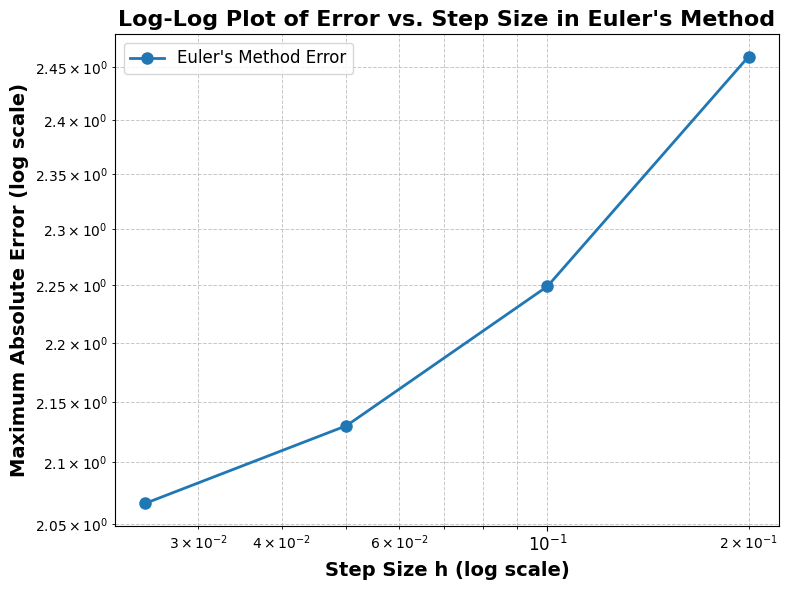

In [40]:


# Create log-log plot
plt.figure(figsize=(8, 6))  # Set figure size
plt.loglog(h_values, errors, marker='o', linestyle='-', linewidth=2, markersize=8, label="Euler's Method Error")

# Labels and title with larger font sizes
plt.xlabel('Step Size h (log scale)', fontsize=14, fontweight='bold')
plt.ylabel('Maximum Absolute Error (log scale)', fontsize=14, fontweight='bold')
plt.title("Log-Log Plot of Error vs. Step Size in Euler's Method", fontsize=16, fontweight='bold')

# Enlarged tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Improved legend
plt.legend(fontsize=12, loc='upper left', frameon=True)

# Improved grid styling
plt.grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# **Solving Projectile Motion Using Euler's Method**

## Introduction
Projectile motion can be described using a system of second-order differential equations. 

## Governing Equations
The motion of a projectile under the influence of gravity (neglecting air resistance) is described by the following second-order differential equations:

- **Horizontal Motion (No Acceleration)**:
  $$ \frac{d^2 x}{dt^2} = 0 $$
  which implies constant velocity:
  $$ \frac{dx}{dt} = v_x = v_{0x} $$

- **Vertical Motion (Acceleration Due to Gravity)**:
  $$ \frac{d^2 y}{dt^2} = -g $$
  which describes uniformly accelerated motion.

By integrating these equations:
- Horizontal position:
  $$ x(t) = x_0 + v_{0x} t $$
- Vertical velocity:
  $$ v_y = v_{0y} - g t $$
- Vertical position:
  $$ y(t) = y_0 + v_{0y} t - \frac{1}{2} g t^2 $$

## Euler's Method Algorithm
Euler's method approximates the solution iteratively using:

$$ y_{n+1} = y_n + h f(y_n) $$

where $h$ is the time step. Applying this to projectile motion:

1. Choose initial conditions:
   - $x_0, y_0$ (initial position)
   - $v_{x0}, v_{y0}$ (initial velocity components)
   - Time step $h$

2. Convert second-order ODEs into first-order ODEs:
   - Define velocity components: $ v_x = \frac{dx}{dt} $, $ v_y = \frac{dy}{dt} $.
   - Define acceleration: $ a_x = 0 $, $ a_y = -g $.

3. Iterate using:
   $$ x_{n+1} = x_n + h v_{x_n} $$
   $$ v_{x_{n+1}} = v_{x_n} $$
   $$ y_{n+1} = y_n + h v_{y_n} $$
   $$ v_{y_{n+1}} = v_{y_n} - h g $$

4. At each step $n$, the projectile's position is given by the coordinate pair:
   $$ (x_n, y_n) $$

5. Repeat until $y_n \leq 0$ (projectile hits the ground).

## Implementation Outline
1. Define parameters: $g, h, x_0, y_0, v_{x0}, v_{y0}$.
2. Initialize lists for position and velocity.
3. Use a loop to update values using Euler's equations.
4. Stop when the projectile reaches the ground.
5. Plot $x$ vs. $y$ to visualize the trajectory.

## Conclusion
Projectile motion is fundamentally governed by second-order ODEs. However, for numerical implementation, these equations are converted into a system of first-order ODEs. Euler's method provides a straightforward way to approximate the trajectory, though more accurate methods such as Runge-Kutta can improve precision. By choosing a sufficiently small time step $h$, we can achieve a high degree of accuracy in predicting the trajectory.


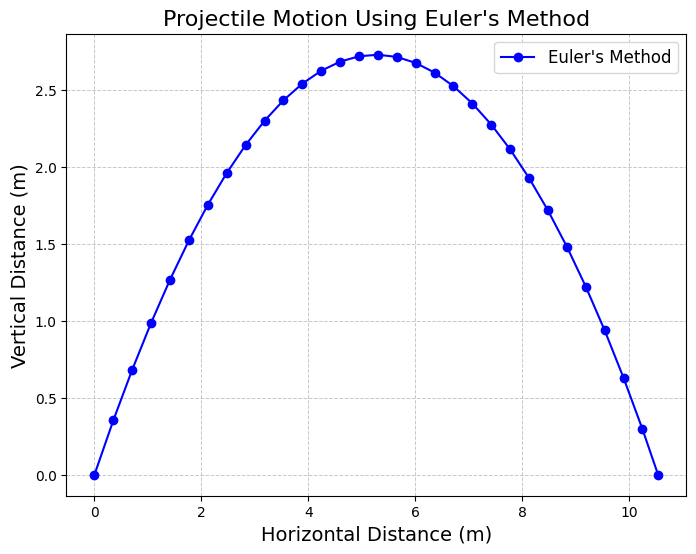

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Define the projectile motion parameters
g = 9.81  # Acceleration due to gravity (m/s^2)
h = 0.05  # Time step (s)

# Initial conditions
x0, y0 = 0.0, 0.0  # Initial position (m)
v0 = 10.0  # Initial velocity (m/s)
theta = 45.0  # Launch angle (degrees)
vx0 = v0 * np.cos(np.radians(theta))  # Initial horizontal velocity
vy0 = v0 * np.sin(np.radians(theta))  # Initial vertical velocity

# Lists to store results
x_values = [x0]
y_values = [y0]
t_values = [0]  # Store time values
vx, vy = vx0, vy0
x, y = x0, y0

##################################################################################
################################ Euler's Method Iteration ########################
# Euler's Method Iteration
t = 0.0
while y >= 0:  # Stop when the projectile hits the ground
    x_new = x + h * vx
    y_new = y + h * vy
    vx_new = vx  # No horizontal acceleration
    vy_new = vy - h * g  # Update vertical velocity due to gravity

    # Stop exactly at the ground using linear interpolation
    if y_new < 0:
        alpha = y / (y - y_new)  # Interpolation factor
        x_final = x + alpha * (x_new - x)  # Adjusted x position at ground hit
        y_final = 0  # Ensure projectile lands exactly on the ground
        t_final = t + alpha * h  # Adjusted final time
        
        x_values.append(x_final)
        y_values.append(y_final)
        t_values.append(t_final)
        break

    # Update values
    x, y, vx, vy = x_new, y_new, vx_new, vy_new
    x_values.append(x)
    y_values.append(y)
    t += h
    t_values.append(t)

##################################################################################
##################################################################################

# Convert lists to numpy arrays for better performance
x_values = np.array(x_values)
y_values = np.array(y_values)
t_values = np.array(t_values)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label="Euler's Method")

# Labels and title
plt.xlabel("Horizontal Distance (m)", fontsize=14)
plt.ylabel("Vertical Distance (m)", fontsize=14)
plt.title("Projectile Motion Using Euler's Method", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", linewidth=0.7, alpha=0.7)

# Show plot
plt.show()

# **How to Remove Dimensions (Non-Dimensionalization)**

Non-dimensionalization is a mathematical technique used to remove physical units from equations by defining **dimensionless variables**. This process simplifies analysis, reduces the number of parameters, and makes equations applicable across different scales.

## **Steps to Non-Dimensionalize an Equation**
### **Step 1: Identify Characteristic Scales**
Every system has **natural scales** for key quantities:
- **Length scale** $x_c$ (e.g., maximum displacement, total distance)
- **Time scale** $T$ (e.g., time to reach maximum height)
- **Velocity scale** $v_c$ (e.g., initial velocity)
- **Acceleration scale** $a_c$ (e.g., gravity)

These characteristic scales help define **dimensionless variables**.

### **Step 2: Define Dimensionless Variables**
To remove dimensions, define new variables in terms of characteristic scales:

- **Dimensionless position:**  
  $$ \tilde{x} = \frac{x}{x_c}, \quad \tilde{y} = \frac{y}{x_c} $$
- **Dimensionless time:**  
  $$ \tilde{t} = \frac{t}{T} $$
- **Dimensionless velocity:**  
  $$ \tilde{v} = \frac{v}{v_c} $$

### **Step 3: Rewrite the Equations in Dimensionless Form**
Using the chain rule:

$$
\frac{dx}{dt} = x_c \frac{d\tilde{x}}{dt} = x_c \frac{d\tilde{x}}{d\tilde{t}} \frac{d\tilde{t}}{dt}
$$

Since $T$ is the time scale, we substitute $ \frac{d\tilde{t}}{dt} = \frac{1}{T} $:

$$
\frac{dx}{dt} = \frac{x_c}{T} \frac{d\tilde{x}}{d\tilde{t}}
$$

By rewriting all terms using their dimensionless counterparts, we eliminate physical units.

---

## **Domentionless Projectile Motion**
Consider the dimensional equations of projectile motion:

$$
\frac{dx}{dt} = v_x, \quad \frac{dy}{dt} = v_y, \quad \frac{dv_y}{dt} = -g
$$

### **Step 1: Define Characteristic Scales**
- **Length scale:** $ x_c = \frac{v_0^2}{g} $ (maximum range)
- **Time scale:** $ T = \frac{v_0}{g} $ (flight time)
- **Velocity scale:** $ v_c = v_0 $ (initial velocity)

### **Step 2: Define Dimensionless Variables**
$$
\tilde{x} = \frac{x}{x_c}, \quad \tilde{y} = \frac{y}{x_c}, \quad \tilde{t} = \frac{t}{T}, \quad \tilde{v}_x = \frac{v_x}{v_0}, \quad \tilde{v}_y = \frac{v_y}{v_0}
$$

### **Step 3: Rewrite the Equations**
Rewriting the system using these variables:

$$
\frac{d\tilde{x}}{d\tilde{t}} = \tilde{v}_x, \quad \frac{d\tilde{y}}{d\tilde{t}} = \tilde{v}_y, \quad \frac{d\tilde{v}_y}{d\tilde{t}} = -1
$$

Now the equations **no longer depend on physical units**, and gravity is simply represented as **$-1$**.



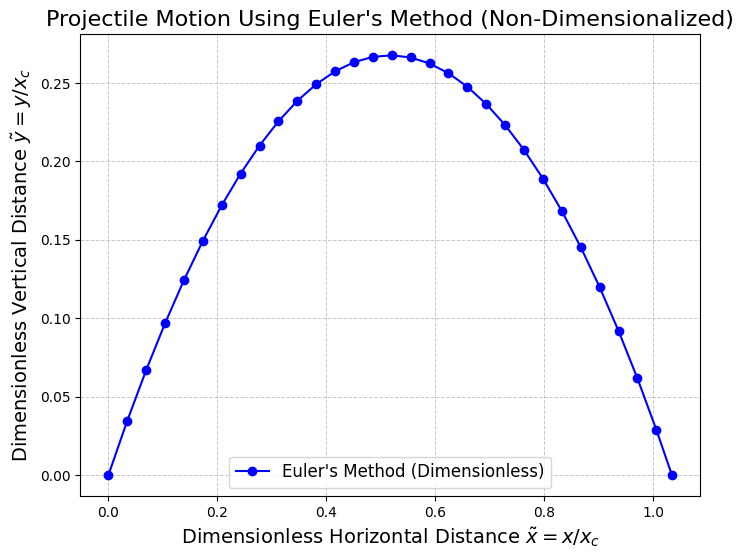

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define the projectile motion parameters
g = 9.81  # Acceleration due to gravity (m/s^2)
v0 = 10.0  # Initial velocity (m/s)
theta = 45.0  # Launch angle (degrees)

# Compute characteristic scales
x_c = v0**2 / g  # Characteristic length
T = v0 / g       # Characteristic time

# Non-dimensionalize the initial conditions
vx0 = np.cos(np.radians(theta))  # Dimensionless horizontal velocity
vy0 = np.sin(np.radians(theta))  # Dimensionless vertical velocity

# Step size in dimensionless time
h_dim = 0.05  # Time step in seconds (original)
h = h_dim / T  # Dimensionless time step

# Initialize dimensionless variables
x, y = 0.0, 0.0  # Start at origin
vx, vy = vx0, vy0
t = 0.0  # Start at t = 0

# Lists to store results
x_values = [x]
y_values = [y]
t_values = [t]

##################################################################################
############################# Euler's Method Iteration ###########################
while y >= 0:  # Stop when the projectile hits the ground
    # Euler updates in dimensionless form
    x_new = x + h * vx
    y_new = y + h * vy
    vx_new = vx  # No horizontal acceleration
    vy_new = vy - h  # Gravity is now -1 in dimensionless form

    # Stop exactly at the ground using linear interpolation
    if y_new < 0:
        alpha = y / (y - y_new)  # Interpolation factor
        x_final = x + alpha * (x_new - x)  # Adjusted x position at ground hit
        y_final = 0  # Ensure projectile lands exactly on the ground
        t_final = t + alpha * h  # Adjusted final time
        
        x_values.append(x_final)
        y_values.append(y_final)
        t_values.append(t_final)
        break

    # Update values
    x, y, vx, vy = x_new, y_new, vx_new, vy_new
    x_values.append(x)
    y_values.append(y)
    t += h
    t_values.append(t)

##################################################################################
##################################################################################

# Convert lists to numpy arrays
x_values = np.array(x_values)
y_values = np.array(y_values)
t_values = np.array(t_values)

# Plot the results in dimensionless form
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label="Euler's Method (Dimensionless)")

# Labels and title
plt.xlabel("Dimensionless Horizontal Distance $\\tilde{x} = x / x_c$", fontsize=14)
plt.ylabel("Dimensionless Vertical Distance $\\tilde{y} = y / x_c$", fontsize=14)
plt.title("Projectile Motion Using Euler's Method (Non-Dimensionalized)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", linewidth=0.7, alpha=0.7)

# Show plot
plt.show()